In [49]:
from finches import Mpipi_frontend, CALVADOS_frontend
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
from Bio import SeqIO

from tqdm import tqdm
import metapredict


import seaborn as sns

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [9]:
#importing data
def getseq(fasta):
    with open(fasta) as handle:
        for record in SeqIO.parse(handle, "fasta"):
            sequence = record.seq
    return sequence

#sequences of other cofactors
CCNC = getseq("data/CCNC_aa.fasta")
CDK8 = getseq("data/CDK8_aa.fasta")
CDK19 = getseq("data/CDK19_aa.fasta")
MED13 = getseq("data/MED13_aa.fasta")
POL2RA = getseq("data/POLR2A_aa.fasta")
POL2RA_CTD = str(POL2RA)[1592:1960]

In [78]:
#importing MED12 and MED12L IDRs
MED12_IDRs = pd.read_csv("data/MED12_IDRs.csv")
MED12_IDRs["group"] = MED12_IDRs["group"].apply(lambda x: "MED12_IDR_{}".format(str(x)[0]))
MED12_IDRs = MED12_IDRs.sort_values("group").iloc[:7]
MED12_IDRs = MED12_IDRs.drop("Unnamed: 0", axis=1)
MED12_IDRs = MED12_IDRs.set_index("group")[["Sequence"]]

MED12L_IDRs = pd.read_csv("data/MED12L_IDRs.csv")
MED12L_IDRs["group"] = MED12L_IDRs["group"].apply(lambda x: "MED12L_IDR_{}".format(str(x)[0]))
MED12L_IDRs = MED12L_IDRs.sort_values("group").iloc[:7]
MED12L_IDRs = MED12L_IDRs.drop("Unnamed: 0", axis=1)
MED12L_IDRs = MED12L_IDRs.set_index("group")[["Sequence"]]

MED12L_IDRs.head()

,Sequence
group,
MED12L_IDR_1,MAAFGLLSYEQRPLKRPRLGPPDVYPQDPKQKEDELTAVNVKQGFN...
MED12L_IDR_2,SPHMMIGPNNSSIGAPSPGPPGPGMSP
MED12L_IDR_3,GESEVLDEKESISSSSLAGS
MED12L_IDR_4,DLSVTASTRPRSPVGENADEHYSKDHDVKMEIFSPMPGESCENANT...
MED12L_IDR_5,NKKSTTETGVGDEGQKARKNKQE


In [33]:
# Set parameters for finches
cf = CALVADOS_frontend()
mf = Mpipi_frontend()

mpipi_minmax = 2.5
calvados_minmax = 7.5

ticfreq = 2
zero_folded = True
window_size = 15

/Users/kinseylong/miniconda3/envs/finches/lib/python3.9/site-packages/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


In [79]:
MED12_MED12L_IDRs = pd.concat([MED12_IDRs.loc[["MED12_IDR_3", "MED12_IDR_7"]], MED12L_IDRs.loc[["MED12L_IDR_3", "MED12L_IDR_7"]]])
MED12_MED12L_IDRs

,Sequence
group,
MED12_IDR_3,RCGESEAADEKGSIASGSLSAPSA
MED12_IDR_7,YYLEPLPLPPEDEEPPAPTLLEPEKKAPEPPKTDKPGAAPPSTEER...
MED12L_IDR_3,GESEVLDEKESISSSSLAGS
MED12L_IDR_7,MPKPRSYYLQPLPLPPEEEEEEPTSPVSQEPERKSAELSDQGKTTT...


In [85]:
MED13_disorderobj = metapredict.predict_disorder_domains(str(MED13))
MED13_disordered_seqs = MED13_disorderobj.disordered_domains
MED13_IDRs = pd.DataFrame(index = ["MED13_IDR_{}".format(x) for x in np.arange(1, len(MED13_disordered_seqs) + 1)], data = {"Sequence": MED13_disordered_seqs})
MED13_IDRs

,Sequence
MED13_IDR_1,EEKQEDMDWEDDSLAAVEVLVAGVRMIYPACFVLVPQSDIPTPSPV...
MED13_IDR_2,ELLSSGPSMPFIKEGDGSNMDQEYGTAYTPQTHTSFGMPPSSAPPS...
MED13_IDR_3,LPLDSSLLSQPNLVAPTSQSLITPPQMTNTGNANTPSATLASAASS...
MED13_IDR_4,DSVSTGSVFGRSTTLNMQTSQLNTPQDTSCTHILVFPTSASVQVAS...


In [115]:
def makeplots(IDR_df1, IDR_df2, savefig_dir):
    fig, ax = plt.subplots(len(IDR_df1), len(IDR_df2), figsize=(20,20))

    for i in range(len(IDR_df1)):
        seqname1 = IDR_df1.index.to_list()[i]
        seq1 = IDR_df1["Sequence"][i]
        for j in range(len(IDR_df2)):
            seqname2 = IDR_df2.index.to_list()[j]
            seq2 = IDR_df2["Sequence"][j]
            if min(len(seq1), len(seq2)) < 31:
                windowsizevar = 5
            else:
                windowsizevar = 31
                
            
            values, seq1index, seq2index = mf.intermolecular_idr_matrix(seq1, seq2, window_size=windowsizevar)[0]
            sns.heatmap(pd.DataFrame(index=seq1index, columns=seq2index, data=values).T, ax=ax[j][i])
            ax[j][i].set_xlabel(seqname1)
            ax[j][i].set_ylabel(seqname2)
    plt.show()
    plt.savefig(savefig_dir, bbox_inches="tight")

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_15098/315412964.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seq1 = IDR_df1["Sequence"][i]
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_15098/315412964.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seq2 = IDR_df2["Sequence"][j]
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_15098/315412964.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

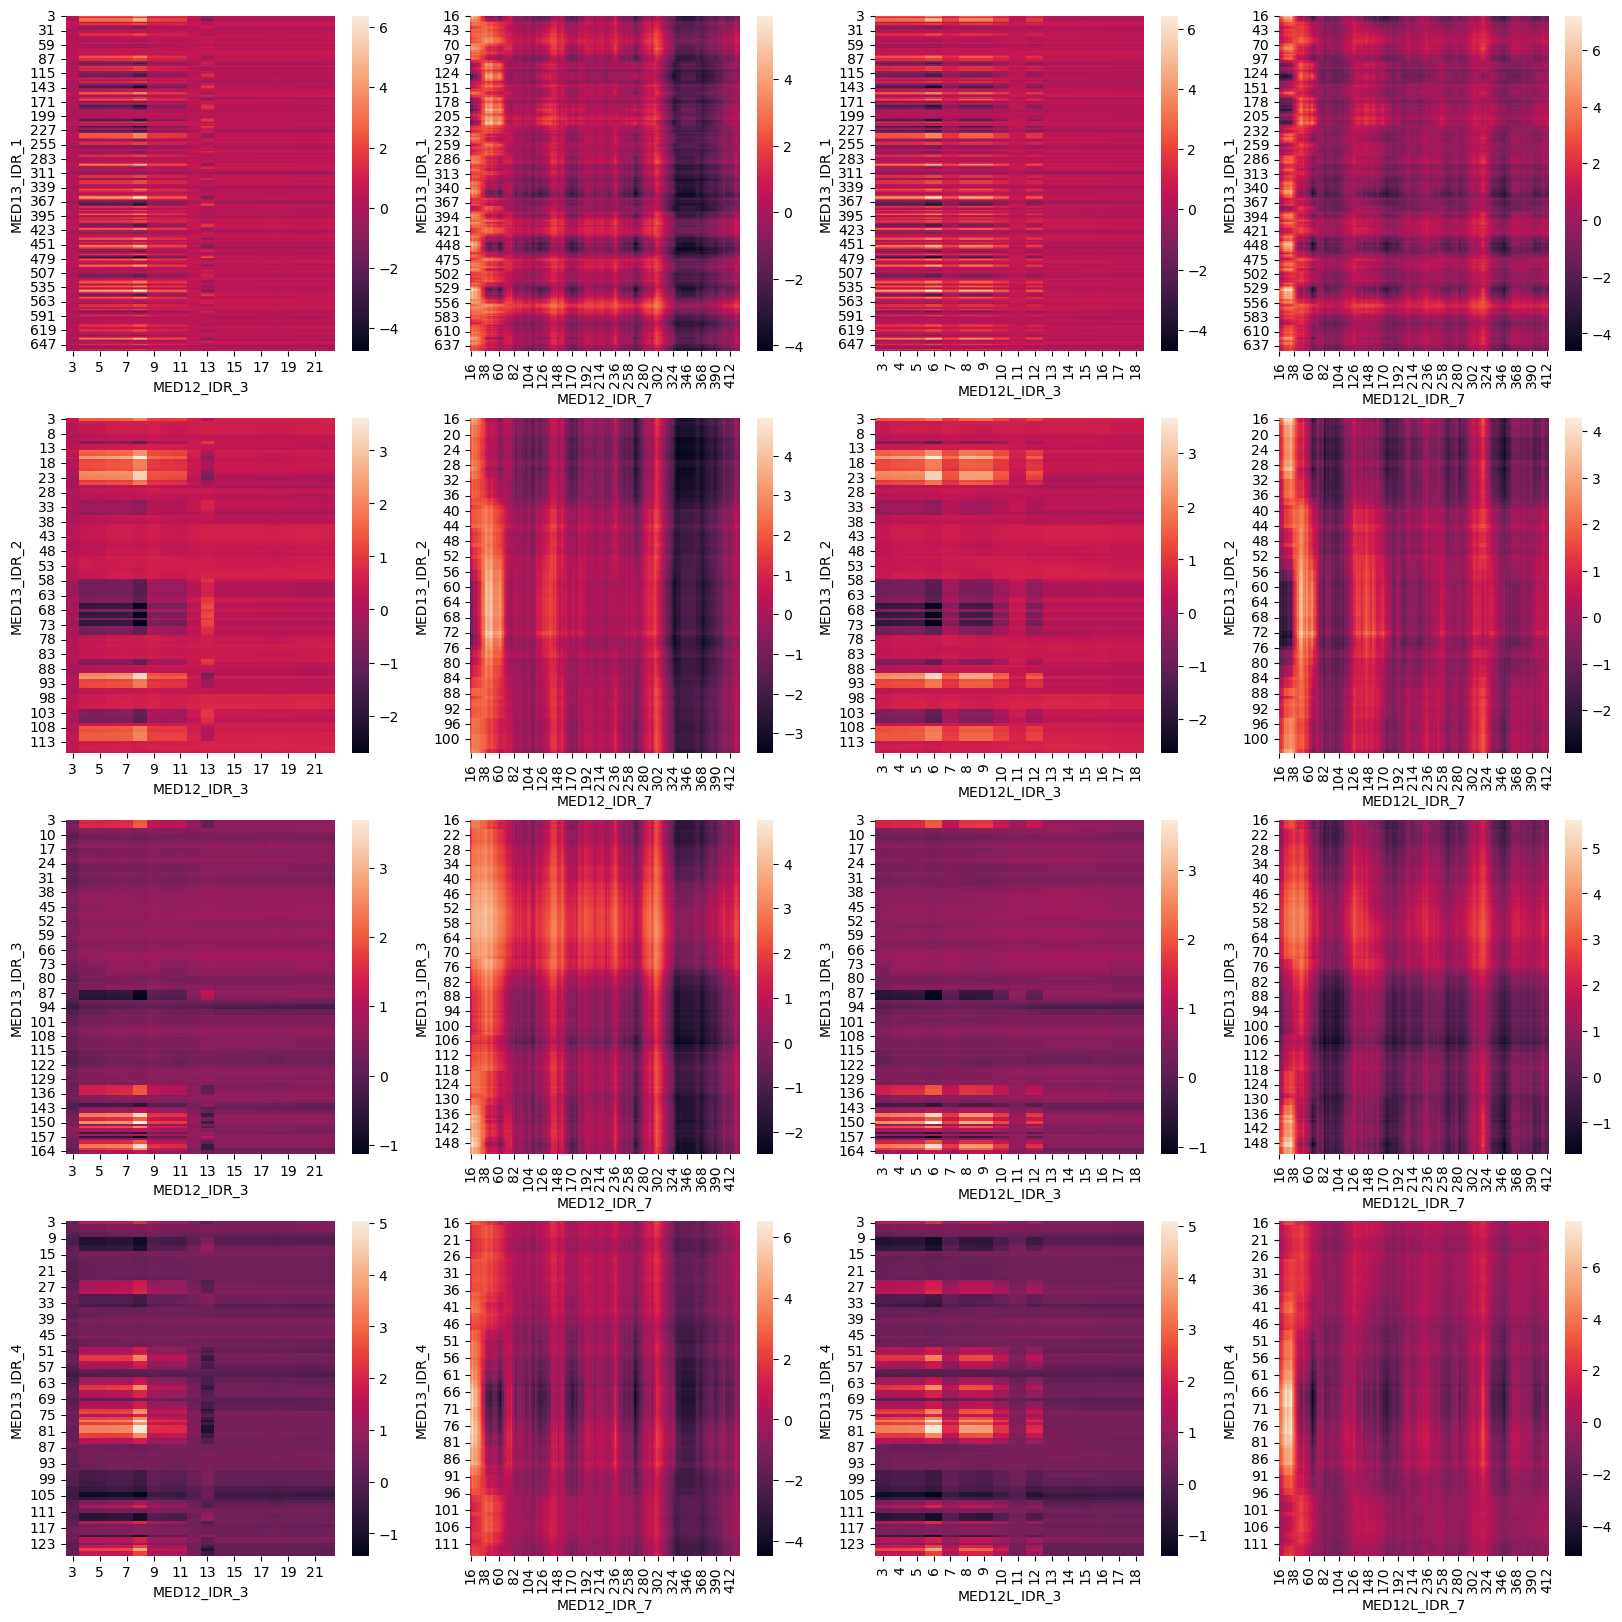

<Figure size 640x480 with 0 Axes>

In [116]:
makeplots(MED12_MED12L_IDRs, MED13_IDRs, "figures/MED12_12L_vs_MED13_IDRs.png")

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_15098/657126700.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values, seq1index, seq2index = mf.intermolecular_idr_matrix(MED12L_IDRs["Sequence"][-1], POL2RA_CTD)[0]


Text(50.722222222222214, 0.5, 'POL2RA CTD index')

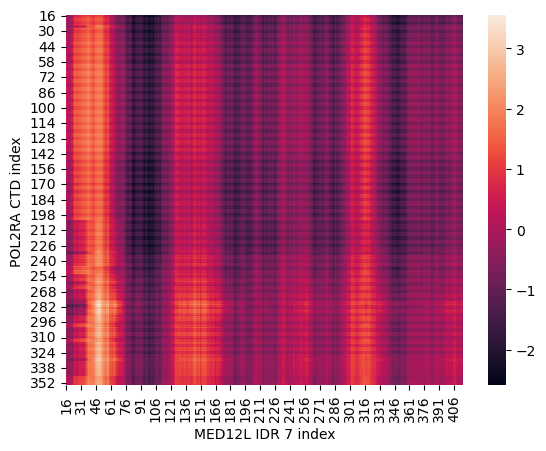

In [60]:
values, seq1index, seq2index = mf.intermolecular_idr_matrix(MED12L_IDRs["Sequence"][-1], POL2RA_CTD)[0]
sns.heatmap(pd.DataFrame(index=seq1index, columns=seq2index, data=values).T)
plt.xlabel("MED12L IDR 7 index")
plt.ylabel("POL2RA CTD index")

In [35]:
#Calculate interactions
def runfinches(seq1, seq2):
    matrix = mf.intermolecular_idr_matrix(seq1, seq2)[0][0]
    # Calculate overall interaction score
    epsilon = mf.epsilon(seq1, seq2)
    # Get mean of attractive interactions
    attractive = matrix[matrix < 0].mean()
    # Get mean of repulsive interactions
    repulsive = matrix[matrix > 0].mean()
    return attractive, repulsive, epsilon

def runfinches_ondf(df, seq2):
    finaldf = df.copy()
    finaldf[['Attractive', 'Repulsive', 'Total']] = finaldf['Sequence'].apply(lambda seq1: pd.Series(runfinches(seq1, seq2)))
    return finaldf

In [40]:
runfinches(MED12L_IDRs["Sequence"][-1], POL2RA_CTD)

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_15098/1570539275.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  runfinches(MED12L_IDRs["Sequence"][-1], POL2RA_CTD)


(-0.772975149408013, 0.7450169332185478, -4.298081693256606)

In [42]:
runfinches(MED12L_IDRs["Sequence"][-1], POL2RA_CTD)

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_15098/1570539275.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  runfinches(MED12L_IDRs["Sequence"][-1], POL2RA_CTD)


(-0.772975149408013, 0.7450169332185478, -4.298081693256606)

In [44]:
POL2RA_CTD

'YSPTSPAYEPRSPGGYTPQSPSYSPTSPSYSPTSPSYSPTSPNYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPSYSPTSPNYSPTSPNYTPTSPSYSPTSPSYSPTSPNYTPTSPNYSPTSPSYSPTSPSYSPTSPSYSPSSPRYTPQSPTYTPSSPSYSPSSPSYSPASPKYTPTSPSYSPSSPEYTPTSPKYSPTSPKYSPTSPKYSPTSPTYSPTTPKYSPTSPTYSPTSPVYTPTSPKYSPTSPTYSPTSPKYSPTSPTYSPTSPKGSTYSPTSPGYSPTSPTYSLTSPA'

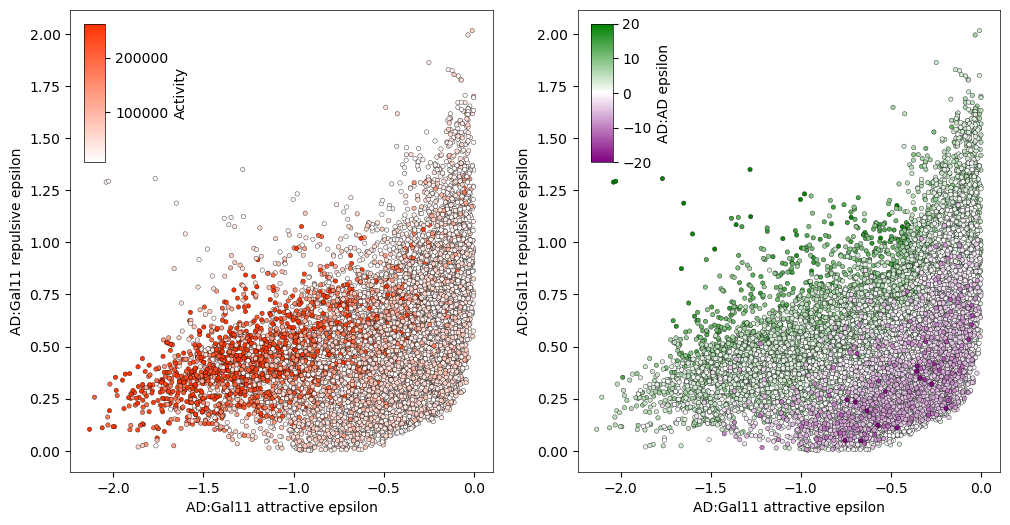

In [8]:
# Plot the interactions, colored by activity and self interaction

seq_data = seq_data.sort_values("epsilon", ascending=False)
activity = seq_data["Activity_BioRepB_BYS4"]

# Colormap that goes from transparent to red
cmap = mcolors.LinearSegmentedColormap.from_list("TransparentRed", [(1, 1, 1), (1, 0.2, 0)])
norm = plt.Normalize(vmin=activity.min(), vmax=activity.max())

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First plot: Color by activity
sc1 = axs[0].scatter(
    seq_data["gal11_attractive"], 
    seq_data["gal11_repulsive"], 
    # s=norm(seq_data["Activity_BioRepB_BYS4"]) * 50,
    s=10,
    c=seq_data["Activity_BioRepB_BYS4"], 
    cmap=cmap, 
    edgecolors="black", 
    linewidth=0.25       
)

axs[0].set_xlabel("AD:Gal11 attractive epsilon")
axs[0].set_ylabel("AD:Gal11 repulsive epsilon")

cax = inset_axes(axs[0], width="5%", height="30%", loc="upper left", borderpad=1)
plt.colorbar(sc1, cax=cax, orientation="vertical", label="Activity")

# Colormap from purple to green
cmap = mcolors.LinearSegmentedColormap.from_list("PurpleWhiteGreen", ["purple", "white", "green"])

# Normalize the color scale with zero centered, so white represents zero
max_val = max(abs(seq_data["epsilon"].min()), abs(seq_data["epsilon"].max()))
norm =  plt.Normalize(vmin=-20, vmax=20)

# Second plot: Color by tile self-interaction
sc1 = axs[1].scatter(
    seq_data["gal11_attractive"], 
    seq_data["gal11_repulsive"], 
    # s=norm(seq_data["epsilon"]) * 20,  # Scale size based on color values
    s=10,
    c=seq_data["epsilon"], 
    cmap=cmap, 
    norm=norm,
    edgecolors="black",  # Black outline
    linewidth=0.25        # Adjust outline thickness
)

axs[1].set_xlabel("AD:Gal11 attractive epsilon")
axs[1].set_ylabel("AD:Gal11 repulsive epsilon")

cax = inset_axes(axs[1], width="5%", height="30%", loc="upper left", borderpad=1)
plt.colorbar(sc1, cax=cax, orientation="vertical", label="AD:AD epsilon")

# plt.tight_layout()
plt.show()
